In [1]:
import torch
import torchvision.datasets as datasets
from torchvision import transforms

from utils import load_checkpoint, load_config
from model_fnn import VariationalAutoEncoder

In [2]:
test_dataset = datasets.MNIST(
    root='data',
    train=False,
    transform=transforms.ToTensor(),
    target_transform=None,
    download=True
)

---

## Model generation without training

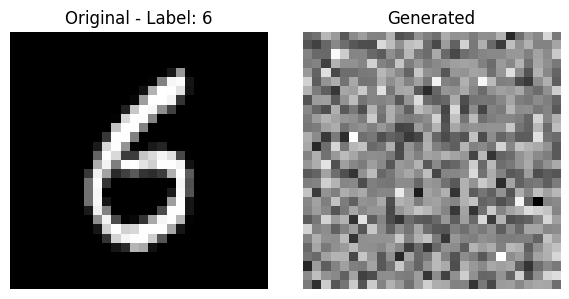

In [3]:
import numpy as np
import matplotlib.pyplot as plt

idx = int(np.random.randint(0, len(test_dataset) - 1, 1)[0])
image, label = test_dataset[idx]

config = load_config(config_path="config.yaml")

model = VariationalAutoEncoder(
    input_dim=config['model']['input_dim'],
    latent_dim=config['model']['latent_dim'],
    activation=config['model']['activation'],
)

model.eval()
with torch.no_grad():
    reconstructed, _, _ = model(image.unsqueeze(dim=0))

# Plot original and generated images side by side
fig, axs = plt.subplots(1, 2, figsize=(6, 3))
axs[0].imshow(image.squeeze(), cmap='gray')
axs[0].set_title(f"Original - Label: {label}")
axs[0].axis('off')

axs[1].imshow(reconstructed.squeeze(), cmap='gray')
axs[1].set_title("Generated")
axs[1].axis('off')

plt.tight_layout()
plt.show()


- Random noise as expected

----

## Generation using Feed Forward Network VAE

There are 2 variations:
- VAE-FNN with MSE Loss.
- VAE-FNN with BCE Loss.

Also there multiple ways to do generations from them:
- Take a real image, use it to get the latent space from Q(Z|X), and feed it to the decoder (to test how good the image reconstruction is). 
- Sample Z (latent vector) from P(X) directly (to test how good the KL is). 

### VAE-FNN with MSE Loss

#### Try to reconstruct real image from its sample space:

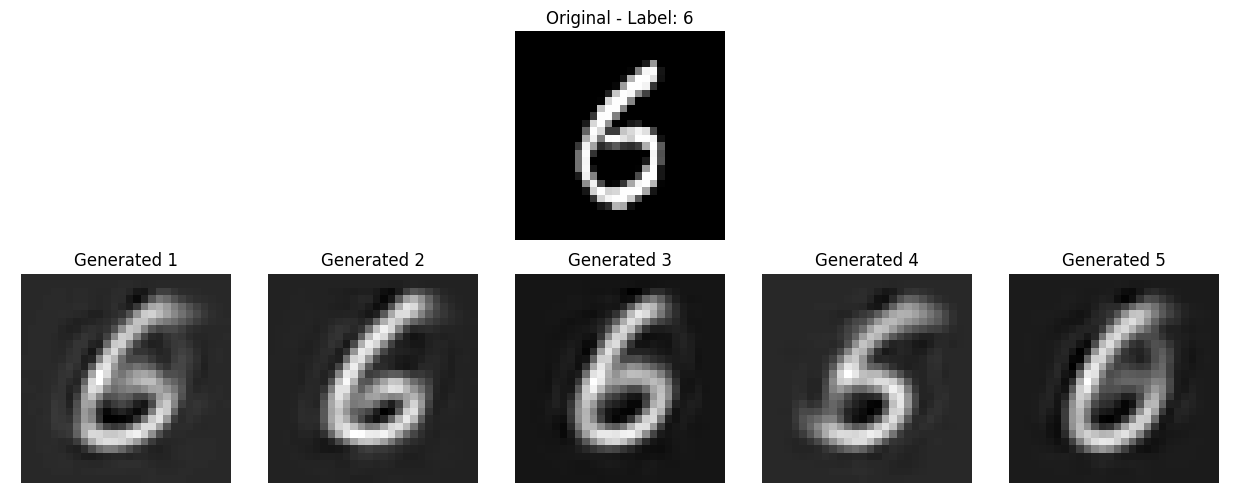

In [4]:
import torch
import matplotlib.pyplot as plt
from model_fnn import VariationalAutoEncoder
from utils import load_checkpoint, load_config

checkpoint_path = r"D:\Repo\VAE-Mnist\outputs\VAE-MNIST_V_FNN_MSE_SUM_2025_06_20_08_10\checkpoint_epoch_60.pkl"
config_path = r"D:\Repo\VAE-Mnist\outputs\VAE-MNIST_V_FNN_MSE_SUM_2025_06_20_08_10\config.yml"

config = load_config(config_path=config_path)
checkpoint = load_checkpoint(checkpoint_path)


model = VariationalAutoEncoder(
    input_dim=config['model']['input_dim'],
    latent_dim=config['model']['latent_dim'],
    activation=config['model']['activation'],
)

model.load_state_dict(checkpoint["model_state_dict"])

number_of_sample = 5
generated_samples = []

for _ in range(number_of_sample):
    model.eval()
    with torch.no_grad():
        reconstructed, _, _ = model(image.unsqueeze(dim=0))
        generated_samples.append(reconstructed.squeeze())

fig, axs = plt.subplots(2, number_of_sample, figsize=(2.5 * number_of_sample, 5))

for ax in axs[0]:
    ax.axis('off')
middle_idx = number_of_sample // 2
axs[0, middle_idx].imshow(image.squeeze(), cmap='gray')
axs[0, middle_idx].set_title(f"Original - Label: {label}")

for i, gen_img in enumerate(generated_samples):
    axs[1, i].imshow(gen_img, cmap='gray')
    axs[1, i].set_title(f"Generated {i+1}")
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()

#### Try to generate new MNIST image by sampling from a normal distribution

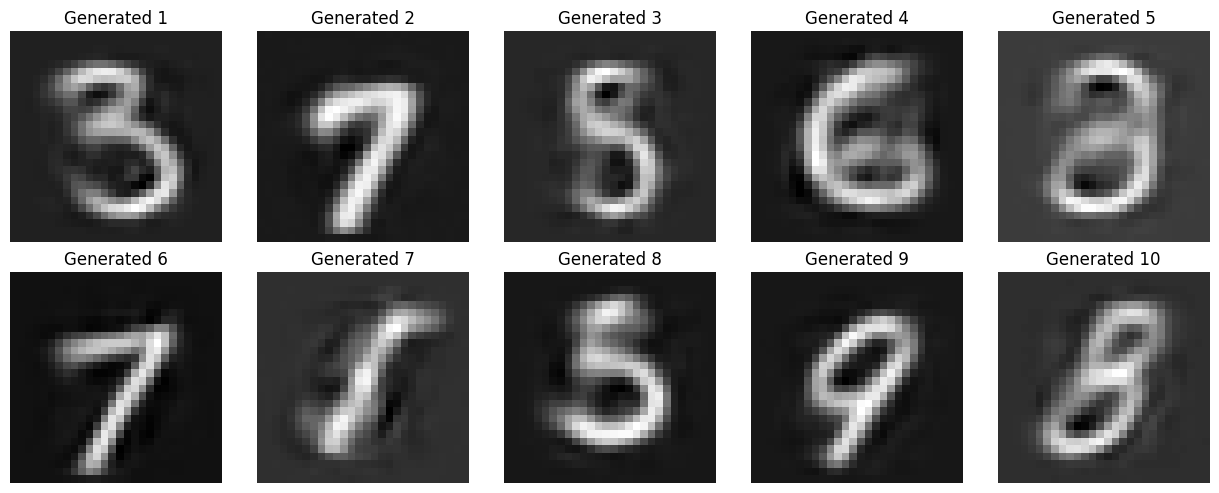

In [5]:
n = 10 # number of sample
row = n // 2 # number of generated image in one row of the plot

z = torch.randn((n, config['model']['latent_dim']))

model.eval()
with torch.no_grad():
    reconstructed = model.decoder(z, config['model']['activation']).view(n, 28, 28)

fig, axs = plt.subplots(2, row, figsize=(2.5 * row, row))

for i, gen_img in enumerate(reconstructed):
    axs[i//row, i%row].imshow(gen_img, cmap='gray')
    axs[i//row, i%row].set_title(f"Generated {i+1}")
    axs[i//row, i%row].axis('off')

plt.tight_layout()
plt.show()

### VAE-FNN with BCE Loss

#### Try to reconstruct real image from its sample space

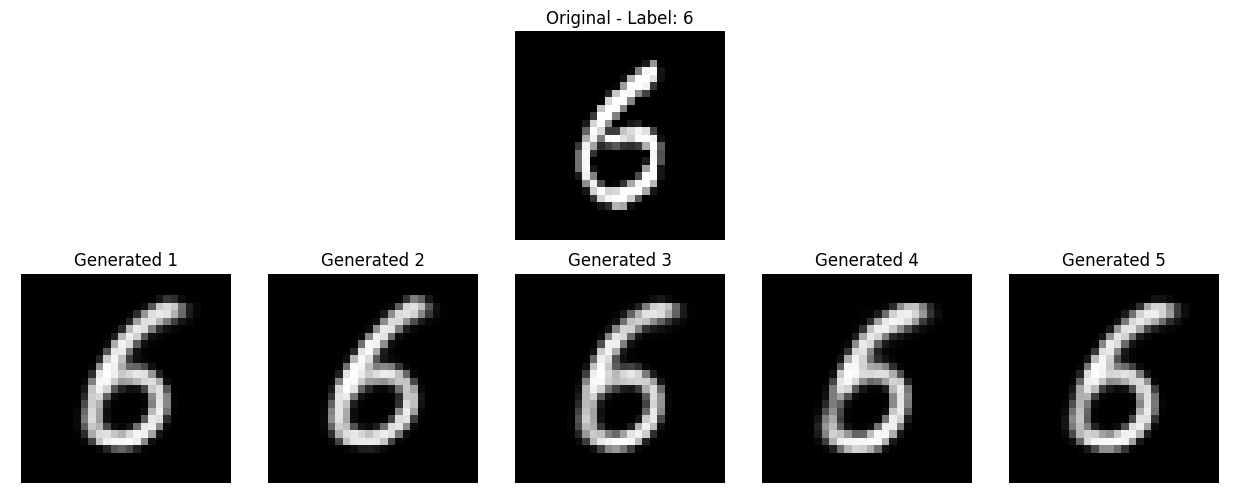

In [6]:
import torch
import matplotlib.pyplot as plt
from model_fnn import VariationalAutoEncoder
from utils import load_checkpoint, load_config

checkpoint_path = r"D:\Repo\VAE-Mnist\outputs\VAE-MNIST_V_FNN_BCE_SUM_2025_06_20_07_15\checkpoint_epoch_60.pkl"
config_path = r"D:\Repo\VAE-Mnist\outputs\VAE-MNIST_V_FNN_BCE_SUM_2025_06_20_07_15\config.yml"

config = load_config(config_path=config_path)
checkpoint = load_checkpoint(checkpoint_path)


model = VariationalAutoEncoder(
    input_dim=config['model']['input_dim'],
    latent_dim=config['model']['latent_dim'],
    activation=config['model']['activation'],
)

model.load_state_dict(checkpoint["model_state_dict"])

number_of_sample = 5
generated_samples = []

for _ in range(number_of_sample):
    model.eval()
    with torch.no_grad():
        reconstructed, _, _ = model(image.unsqueeze(dim=0))
        generated_samples.append(reconstructed.squeeze())

fig, axs = plt.subplots(2, number_of_sample, figsize=(2.5 * number_of_sample, 5))

for ax in axs[0]:
    ax.axis('off')
middle_idx = number_of_sample // 2
axs[0, middle_idx].imshow(image.squeeze(), cmap='gray')
axs[0, middle_idx].set_title(f"Original - Label: {label}")

for i, gen_img in enumerate(generated_samples):
    axs[1, i].imshow(gen_img, cmap='gray')
    axs[1, i].set_title(f"Generated {i+1}")
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()

#### Try to generate new MNIST image by sampling from a normal distribution

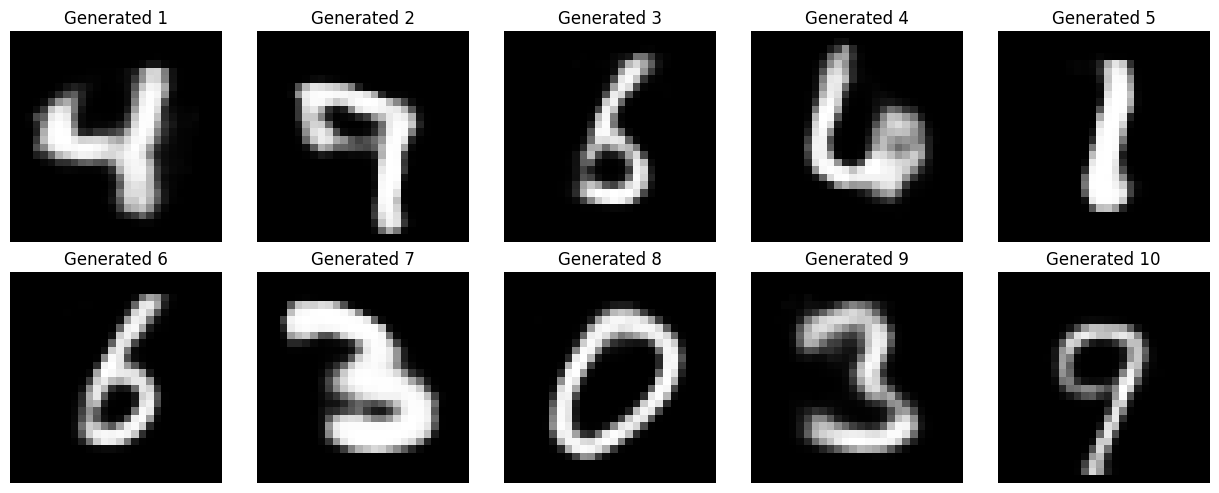

In [7]:
n = 10 # number of sample
row = n // 2 # number of generated image in one row of the plot

z = torch.randn((n, config['model']['latent_dim']))

model.eval()
with torch.no_grad():
    reconstructed = model.decoder(z, config['model']['activation']).view(n, 28, 28)

fig, axs = plt.subplots(2, row, figsize=(2.5 * row, row))

for i, gen_img in enumerate(reconstructed):
    axs[i//row, i%row].imshow(gen_img, cmap='gray')
    axs[i//row, i%row].set_title(f"Generated {i+1}")
    axs[i//row, i%row].axis('off')

plt.tight_layout()
plt.show()

----

## Generation using Convolution Network VAE

There are 2 variations:
- VAE-CNN with MSE Loss.
- VAE-CNN with BCE Loss.

Also there multiple ways to do generations:
- Take a real image, use it to get the latent space from Q(Z|X), and feed it to the decoder (to test how good the image reconstruction is). 
- Sample Z (latent vector) from P(X) directly (to test how good the KL is). 

### VAE-CNN with MSE Loss

#### Try to construction real image from it's sample space 

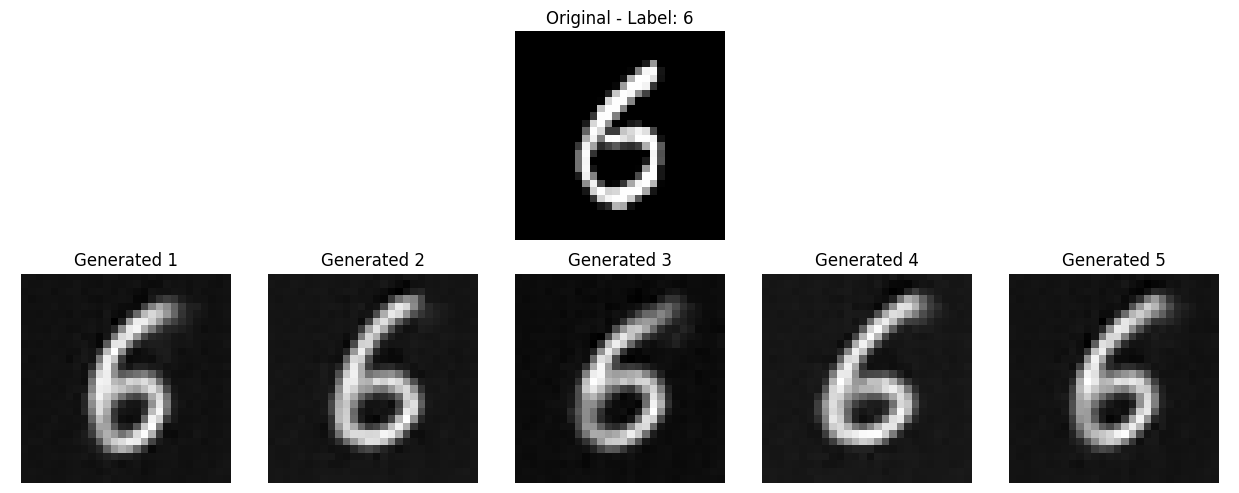

In [8]:
import torch
import matplotlib.pyplot as plt
from model_cnn import VariationalAutoEncoder
from utils import load_checkpoint, load_config

checkpoint_path = r"D:\Repo\VAE-Mnist\outputs\VAE-MNIST_V_CNN_MSE_SUM_2025_06_20_07_47\checkpoint_epoch_60.pkl"
config_path = r"D:\Repo\VAE-Mnist\outputs\VAE-MNIST_V_CNN_MSE_SUM_2025_06_20_07_47\config.yml"

config = load_config(config_path=config_path)
checkpoint = load_checkpoint(checkpoint_path)


model = VariationalAutoEncoder(
    input_dim=config['model']['input_dim'],
    latent_dim=config['model']['latent_dim'],
    activation=config['model']['activation'],
)

model.load_state_dict(checkpoint["model_state_dict"])

number_of_sample = 5
generated_samples = []

for _ in range(number_of_sample):
    model.eval()
    with torch.no_grad():
        reconstructed, _, _ = model(image.unsqueeze(dim=0))
        generated_samples.append(reconstructed.squeeze())

fig, axs = plt.subplots(2, number_of_sample, figsize=(2.5 * number_of_sample, 5))

for ax in axs[0]:
    ax.axis('off')
middle_idx = number_of_sample // 2
axs[0, middle_idx].imshow(image.squeeze(), cmap='gray')
axs[0, middle_idx].set_title(f"Original - Label: {label}")

for i, gen_img in enumerate(generated_samples):
    axs[1, i].imshow(gen_img, cmap='gray')
    axs[1, i].set_title(f"Generated {i+1}")
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()

#### Try to generate new MNIST image by sampling from a normal distribution

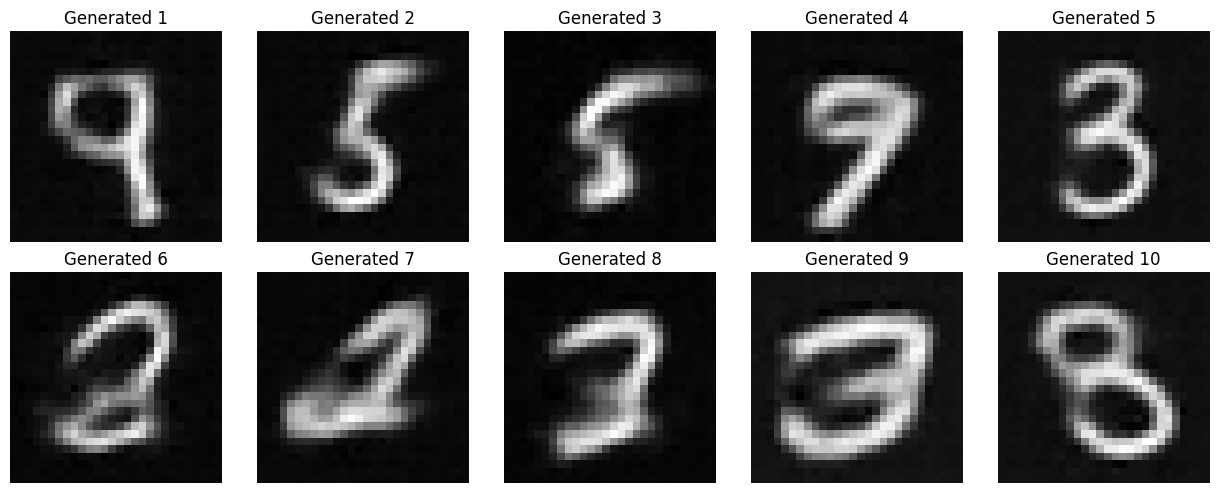

In [9]:
n = 10 # number of sample
row = n // 2 # number of generated image in one row of the plot

z = torch.randn((n, config['model']['latent_dim']))

model.eval()
with torch.no_grad():
    reconstructed = model.decoder(z, config['model']['activation'])
                                  
fig, axs = plt.subplots(2, row, figsize=(2.5 * row, row))

for i, gen_img in enumerate(reconstructed):
    axs[i//row, i%row].imshow(gen_img.squeeze(), cmap='gray')
    axs[i//row, i%row].set_title(f"Generated {i+1}")
    axs[i//row, i%row].axis('off')

plt.tight_layout()
plt.show()

### VAE-CNN with BCE Loss.

#### Try to construction real image from it's sample space 

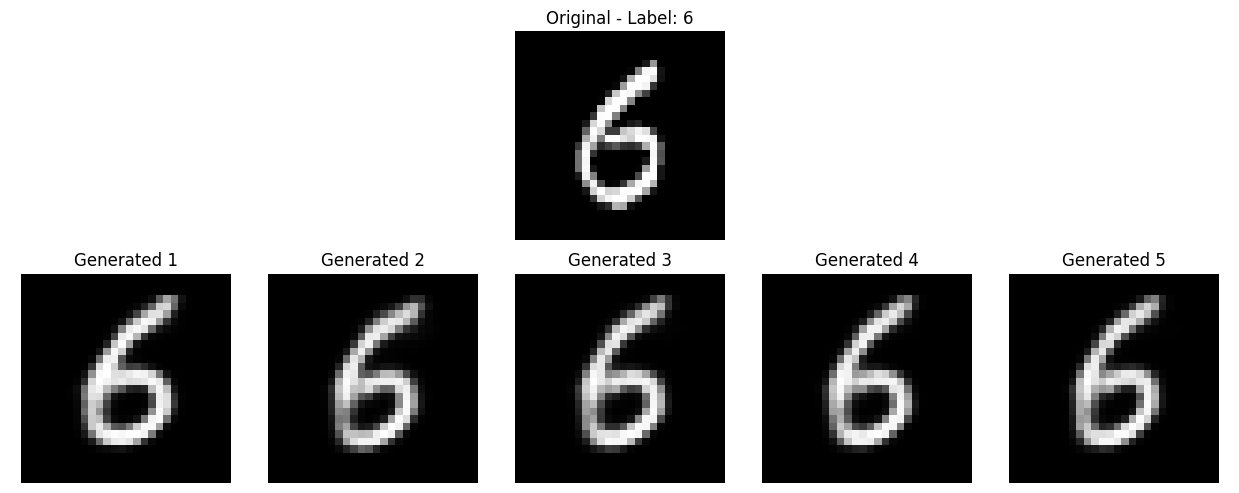

In [10]:
from model_cnn import VariationalAutoEncoder

checkpoint_path = r"D:\Repo\VAE-Mnist\outputs\VAE-MNIST_V_CNN_BCE_SUM_2025_06_20_06_38\checkpoint_epoch_60.pkl"
config_path = r"D:\Repo\VAE-Mnist\outputs\VAE-MNIST_V_CNN_BCE_SUM_2025_06_20_06_38\config.yml"

config = load_config(config_path=config_path)
checkpoint = load_checkpoint(checkpoint_path)


model = VariationalAutoEncoder(
    input_dim=config['model']['input_dim'],
    latent_dim=config['model']['latent_dim'],
    activation=config['model']['activation'],
)

model.load_state_dict(checkpoint["model_state_dict"])

number_of_sample = 5
generated_samples = []

for _ in range(number_of_sample):
    model.eval()
    with torch.no_grad():
        reconstructed, _, _ = model(image.unsqueeze(dim=0))
        generated_samples.append(reconstructed.squeeze())

fig, axs = plt.subplots(2, number_of_sample, figsize=(2.5 * number_of_sample, 5))

for ax in axs[0]:
    ax.axis('off')
middle_idx = number_of_sample // 2
axs[0, middle_idx].imshow(image.squeeze(), cmap='gray')
axs[0, middle_idx].set_title(f"Original - Label: {label}")

for i, gen_img in enumerate(generated_samples):
    axs[1, i].imshow(gen_img, cmap='gray')
    axs[1, i].set_title(f"Generated {i+1}")
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()

#### Try to generate new MNIST image by sampling from a normal distribution

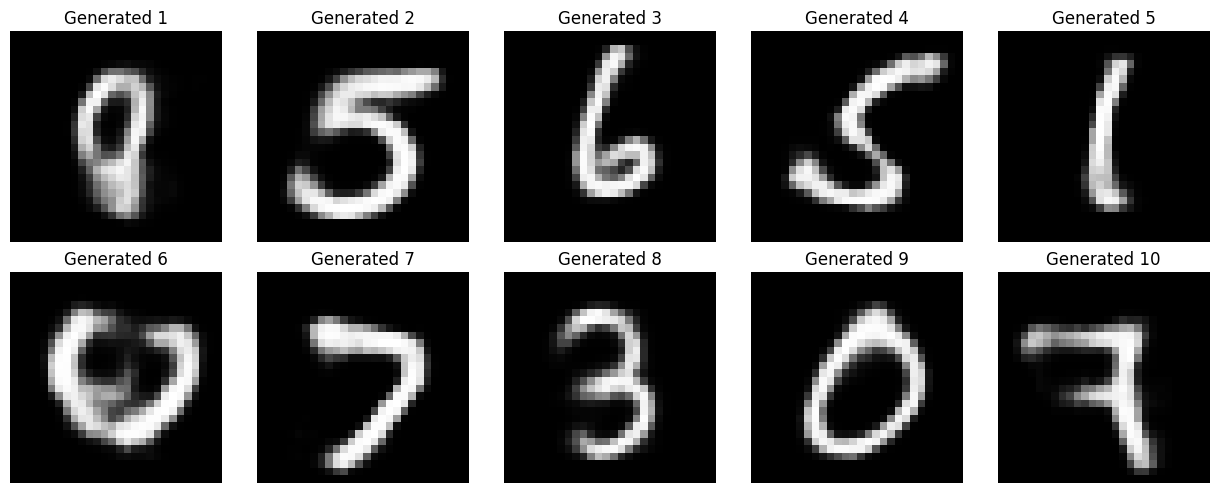

In [11]:
n = 10 # number of sample
row = n // 2 # number of generated image in one row of the plot

z = torch.randn((n, config['model']['latent_dim']))

model.eval()
with torch.no_grad():
    reconstructed = model.decoder(z, config['model']['activation'])
                                  
fig, axs = plt.subplots(2, row, figsize=(2.5 * row, row))

for i, gen_img in enumerate(reconstructed):
    axs[i//row, i%row].imshow(gen_img.squeeze(), cmap='gray')
    axs[i//row, i%row].set_title(f"Generated {i+1}")
    axs[i//row, i%row].axis('off')

plt.tight_layout()
plt.show()

----

## Observations:

- CNN-VAEs are superior to FNN-VAEs, likely because they maintain the geometric information about the image.
- BCE loss is better than MSE loss as a reconstruction loss in this experiment.